In [1]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("../Data/신림_추정연령대.csv")
df.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,월,년,시간대,승객수,일,휴일여부,요일,요일_문자,시간,추정연령대
0,2022-06-01,2.0,230,신림,승차,일반,6,2022,06시간대이전,801.0,1,False,2,수,6,기타
1,2022-06-01,2.0,230,신림,승차,어린이,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
2,2022-06-01,2.0,230,신림,승차,중고생,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
3,2022-06-01,2.0,230,신림,승차,청소년,6,2022,06시간대이전,9.0,1,False,2,수,6,기타
4,2022-06-01,2.0,230,신림,승차,우대권,6,2022,06시간대이전,246.0,1,False,2,수,6,기타


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155520 entries, 0 to 155519
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   수송일자    155520 non-null  object 
 1   호선명     155520 non-null  float64
 2   역번호     155520 non-null  int64  
 3   역명      155520 non-null  object 
 4   승하차구분   155520 non-null  object 
 5   승객유형    155520 non-null  object 
 6   월       155520 non-null  int64  
 7   년       155520 non-null  int64  
 8   시간대     155520 non-null  object 
 9   승객수     155520 non-null  float64
 10  일       155520 non-null  int64  
 11  휴일여부    155520 non-null  bool   
 12  요일      155520 non-null  int64  
 13  요일_문자   155520 non-null  object 
 14  시간      155520 non-null  int64  
 15  추정연령대   155520 non-null  object 
dtypes: bool(1), float64(2), int64(6), object(7)
memory usage: 17.9+ MB


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 승객 수 합산 (승하차구분 무시)
df_grouped = df.groupby(['수송일자', '호선명', '역번호', '역명', '승객유형', '월', '년', '시간대', '일', '휴일여부', '요일', '요일_문자', '시간', '추정연령대'])['승객수'].sum().reset_index()

# 필요한 열 선택
features = ['시간대', '휴일여부', '요일', '시간', '승객수']
X = df_grouped[features]
y = df_grouped['승객유형']

# 범주형 변수 인코딩
le = LabelEncoder()
X['시간대'] = le.fit_transform(X['시간대'])
y = le.fit_transform(y)

# 데이터 정규화
scaler = StandardScaler()
X['승객수'] = scaler.fit_transform(X[['승객수']])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')


/var/folders/b4/mj76666j60z2b6lck86w49wh0000gn/T/ipykernel_4725/2816787054.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['시간대'] = le.fit_transform(X['시간대'])
/var/folders/b4/mj76666j60z2b6lck86w49wh0000gn/T/ipykernel_4725/2816787054.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['승객수'] = scaler.fit_transform(X[['승객수']])


Model Accuracy: 0.8735103626943005


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155520 entries, 0 to 155519
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   수송일자    155520 non-null  object 
 1   호선명     155520 non-null  float64
 2   역번호     155520 non-null  int64  
 3   역명      155520 non-null  object 
 4   승하차구분   155520 non-null  object 
 5   승객유형    155520 non-null  object 
 6   월       155520 non-null  int64  
 7   년       155520 non-null  int64  
 8   시간대     155520 non-null  object 
 9   승객수     155520 non-null  float64
 10  일       155520 non-null  int64  
 11  휴일여부    155520 non-null  bool   
 12  요일      155520 non-null  int64  
 13  요일_문자   155520 non-null  object 
 14  시간      155520 non-null  int64  
 15  추정연령대   155520 non-null  object 
dtypes: bool(1), float64(2), int64(6), object(7)
memory usage: 17.9+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 인코딩
le_time = LabelEncoder()
df_grouped['시간대_encoded'] = le_time.fit_transform(df_grouped['시간대'])

le_type = LabelEncoder()
df_grouped['승객유형_encoded'] = le_type.fit_transform(df_grouped['승객유형'])

# 특성과 타겟 정의
features = ['시간대_encoded', '월', '일', '휴일여부', '요일', '시간', '승객수']
target = '승객유형_encoded'

X = df_grouped[features]
y = df_grouped[target]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 초기화 및 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 예측 및 정확도 계산
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.8277849740932642


교차 검증 점수: [0.85148964 0.86645078 0.85395078 0.86185233 0.86917098]
평균 교차 검증 점수: 0.8606 (+/- 0.0138)


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


최적 파라미터: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
최고 교차 검증 점수: 0.8650
훈련 점수: 0.9094
테스트 점수: 0.8555
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2903
           1       0.45      0.19      0.27       822
           2       0.96      0.95      0.96      2931
           3       1.00      0.99      0.99      2949
           4       0.65      0.79      0.72      2928
           5       0.94      0.95      0.94      2907

    accuracy                           0.86     15440
   macro avg       0.80      0.78      0.78     15440
weighted avg       0.85      0.86      0.85     15440



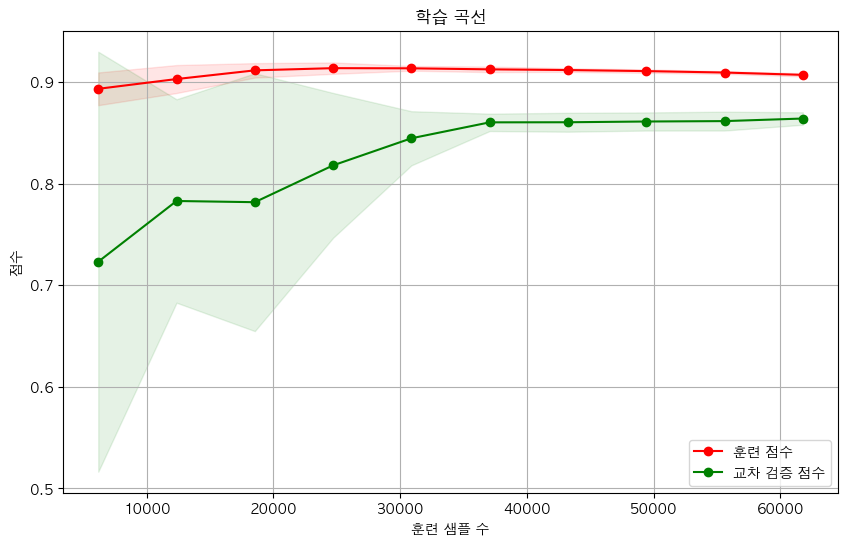

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 교차 검증
cv_scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
print(f"교차 검증 점수: {cv_scores}")
print(f"평균 교차 검증 점수: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# 2. 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print(f"최적 파라미터: {grid_search.best_params_}")
print(f"최고 교차 검증 점수: {grid_search.best_score_:.4f}")

# 3. 최적 모델로 훈련 및 테스트
best_model = grid_search.best_estimator_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)

train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

print(f"훈련 점수: {train_score:.4f}")
print(f"테스트 점수: {test_score:.4f}")

# 4. 분류 보고서
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# 5. 학습 곡선 그리기
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("학습 곡선")
plt.xlabel("훈련 샘플 수")
plt.ylabel("점수")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="훈련 점수")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="교차 검증 점수")

plt.legend(loc="best")
plt.show()


In [12]:
df

,수송일자,호선명,역번호,역명,승하차구분,승객유형,월,년,시간대,승객수,일,휴일여부,요일,요일_문자,시간,추정연령대
0,2022-06-01,2.0,230,신림,승차,일반,6,2022,06시간대이전,801.0,1,False,2,수,6,기타
1,2022-06-01,2.0,230,신림,승차,어린이,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
2,2022-06-01,2.0,230,신림,승차,중고생,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
3,2022-06-01,2.0,230,신림,승차,청소년,6,2022,06시간대이전,9.0,1,False,2,수,6,기타
4,2022-06-01,2.0,230,신림,승차,우대권,6,2022,06시간대이전,246.0,1,False,2,수,6,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155515,2024-05-31,2.0,230,신림,하차,어린이,5,2024,24시간대이후,0.0,31,False,4,금,24,20~30대 일반인
155516,2024-05-31,2.0,230,신림,하차,중고생,5,2024,24시간대이후,0.0,31,False,4,금,24,20~30대 일반인
155517,2024-05-31,2.0,230,신림,하차,청소년,5,2024,24시간대이후,16.0,31,False,4,금,24,20~30대 일반인
155518,2024-05-31,2.0,230,신림,하차,우대권,5,2024,24시간대이후,24.0,31,False,4,금,24,20~30대 일반인


> 데이를 다시 확인해보니 tail쪽에 추정연령대 컬럼에 데이터가 잘못 들어감                    
> 추정연령대 삭제

In [14]:
new_df = df.drop(columns='추정연령대')
new_df

,수송일자,호선명,역번호,역명,승하차구분,승객유형,월,년,시간대,승객수,일,휴일여부,요일,요일_문자,시간
0,2022-06-01,2.0,230,신림,승차,일반,6,2022,06시간대이전,801.0,1,False,2,수,6
1,2022-06-01,2.0,230,신림,승차,어린이,6,2022,06시간대이전,0.0,1,False,2,수,6
2,2022-06-01,2.0,230,신림,승차,중고생,6,2022,06시간대이전,0.0,1,False,2,수,6
3,2022-06-01,2.0,230,신림,승차,청소년,6,2022,06시간대이전,9.0,1,False,2,수,6
4,2022-06-01,2.0,230,신림,승차,우대권,6,2022,06시간대이전,246.0,1,False,2,수,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155515,2024-05-31,2.0,230,신림,하차,어린이,5,2024,24시간대이후,0.0,31,False,4,금,24
155516,2024-05-31,2.0,230,신림,하차,중고생,5,2024,24시간대이후,0.0,31,False,4,금,24
155517,2024-05-31,2.0,230,신림,하차,청소년,5,2024,24시간대이후,16.0,31,False,4,금,24
155518,2024-05-31,2.0,230,신림,하차,우대권,5,2024,24시간대이후,24.0,31,False,4,금,24


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155520 entries, 0 to 155519
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   수송일자    155520 non-null  object 
 1   호선명     155520 non-null  float64
 2   역번호     155520 non-null  int64  
 3   역명      155520 non-null  object 
 4   승하차구분   155520 non-null  object 
 5   승객유형    155520 non-null  object 
 6   월       155520 non-null  int64  
 7   년       155520 non-null  int64  
 8   시간대     155520 non-null  object 
 9   승객수     155520 non-null  float64
 10  일       155520 non-null  int64  
 11  휴일여부    155520 non-null  bool   
 12  요일      155520 non-null  int64  
 13  요일_문자   155520 non-null  object 
 14  시간      155520 non-null  int64  
dtypes: bool(1), float64(2), int64(6), object(6)
memory usage: 16.8+ MB


> 승객유형별 나이대 재분류

In [18]:
import pandas as pd
import numpy as np

# 기존 승객유형별 나이대 매핑
age_group_mapping = {
    '중고생': '10대',
    '어린이': '10대',
    '청소년': '10대',
    '우대권': '50대 이상',
    '외국어린이': '10대'
}

# 일반 승객 나이대 비율
base_age_group_ratios = {
    '20대': 0.25,
    '30대': 0.35,
    '40대': 0.25,
    '50대 이상': 0.15
}

# 시간대별 가중치
time_age_group_weights = {
    '출근시간': {'10대': 0.6, '20대': 1.2, '30대': 1.5, '40대': 1.4, '50대 이상': 0.8},
    '퇴근시간': {'10대': 0.7, '20대': 1.1, '30대': 1.2, '40대': 1.3, '50대 이상': 1.0},
    '일반시간': {'10대': 1.2, '20대': 0.9, '30대': 0.8, '40대': 0.7, '50대 이상': 1.4}
}

# 요일별 가중치
weekday_age_group_weights = {
    '평일': {'10대': 0.8, '20대': 1.0, '30대': 1.3, '40대': 1.2, '50대 이상': 0.7},
    '주말': {'10대': 1.5, '20대': 1.3, '30대': 0.7, '40대': 0.6, '50대 이상': 1.4},
    '공휴일': {'10대': 1.4, '20대': 1.2, '30대': 0.8, '40대': 0.7, '50대 이상': 1.5}
}

def get_time_period(hour):
    if 7 <= hour <= 9:
        return '출근시간'
    elif 17 <= hour <= 19:
        return '퇴근시간'
    else:
        return '일반시간'

def get_weekday_type(is_holiday, weekday):
    if is_holiday:
        return '공휴일'
    return '주말' if weekday >= 5 else '평일'

def calculate_age_group_counts(row):
    if row['승객유형'] in age_group_mapping:
        return {age_group_mapping[row['승객유형']]: row['승객수']}
    
    time_period = get_time_period(row['시간'])
    weekday_type = get_weekday_type(row['휴일여부'], row['요일'])

    adjusted_ratios = {
        age_group: ratio *
                   time_age_group_weights[time_period][age_group] *
                   weekday_age_group_weights[weekday_type][age_group]
        for age_group, ratio in base_age_group_ratios.items()
    }

    total = sum(adjusted_ratios.values())
    adjusted_ratios = {k: v / total for k, v in adjusted_ratios.items()}

    return {age_group: round(row['승객수'] * ratio) for age_group, ratio in adjusted_ratios.items()}

# 나이대별 승객 수 계산 및 데이터프레임에 추가
age_group_columns = ['10대', '20대', '30대', '40대', '50대 이상']
for age_group in age_group_columns:
    new_df[age_group] = 0

for index, row in new_df.iterrows():
    age_group_counts = calculate_age_group_counts(row)
    for age_group, count in age_group_counts.items():
        new_df.at[index, age_group] = count

# '승객유형' 컬럼 삭제
new_df = new_df.drop(columns=['승객유형'])

# 결과 확인
print(new_df.head())
print(new_df.info())


         수송일자  호선명  역번호  역명 승하차구분  월     년      시간대    승객수  일   휴일여부  요일  \
0  2022-06-01  2.0  230  신림    승차  6  2022  06시간대이전  801.0  1  False   2   
1  2022-06-01  2.0  230  신림    승차  6  2022  06시간대이전    0.0  1  False   2   
2  2022-06-01  2.0  230  신림    승차  6  2022  06시간대이전    0.0  1  False   2   
3  2022-06-01  2.0  230  신림    승차  6  2022  06시간대이전    9.0  1  False   2   
4  2022-06-01  2.0  230  신림    승차  6  2022  06시간대이전  246.0  1  False   2   

  요일_문자  시간  10대  20대  30대  40대  50대 이상  
0     수   6    0  191  308  178     124  
1     수   6    0    0    0    0       0  
2     수   6    0    0    0    0       0  
3     수   6    9    0    0    0       0  
4     수   6    0    0    0    0     246  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155520 entries, 0 to 155519
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   수송일자    155520 non-null  object 
 1   호선명     155520 non-null  float64
 2   역번호     155520 non-null

In [22]:
new_df.columns

Index(['수송일자', '호선명', '역번호', '역명', '승하차구분', '월', '년', '시간대', '승객수', '일',
       '휴일여부', '요일', '요일_문자', '시간', '10대', '20대', '30대', '40대', '50대 이상'],
      dtype='object')

In [33]:
df = new_df

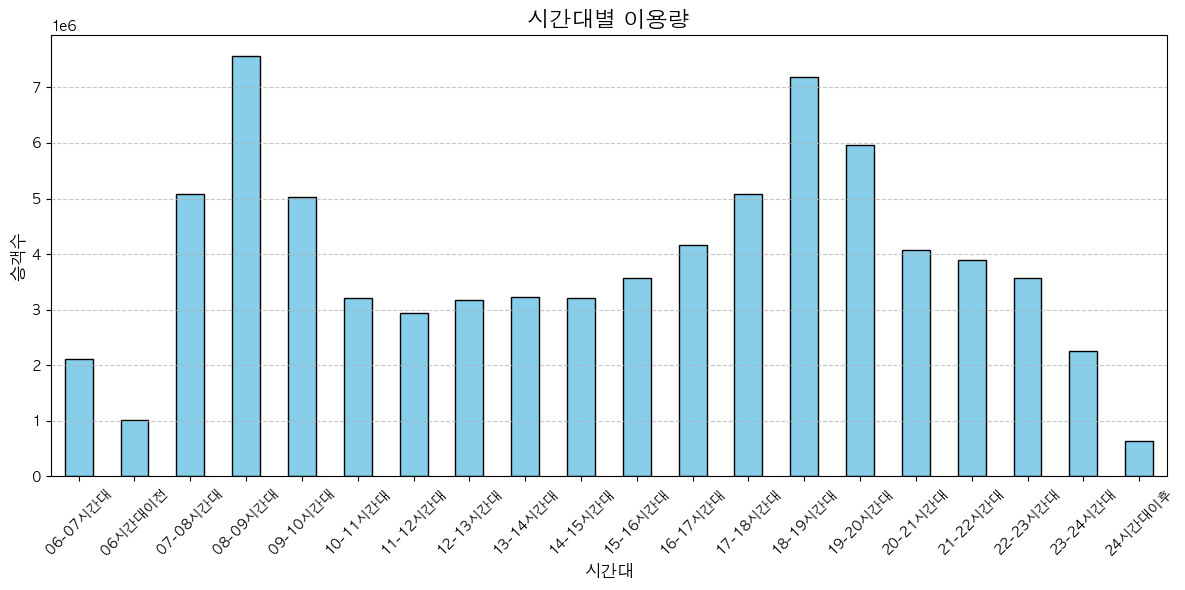

In [34]:
import matplotlib.pyplot as plt

# 시간대별 이용량 계산
time_usage = df.groupby('시간대')['승객수'].sum()

# 그래프 생성
plt.figure(figsize=(12, 6))
time_usage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('시간대별 이용량', fontsize=16)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('승객수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


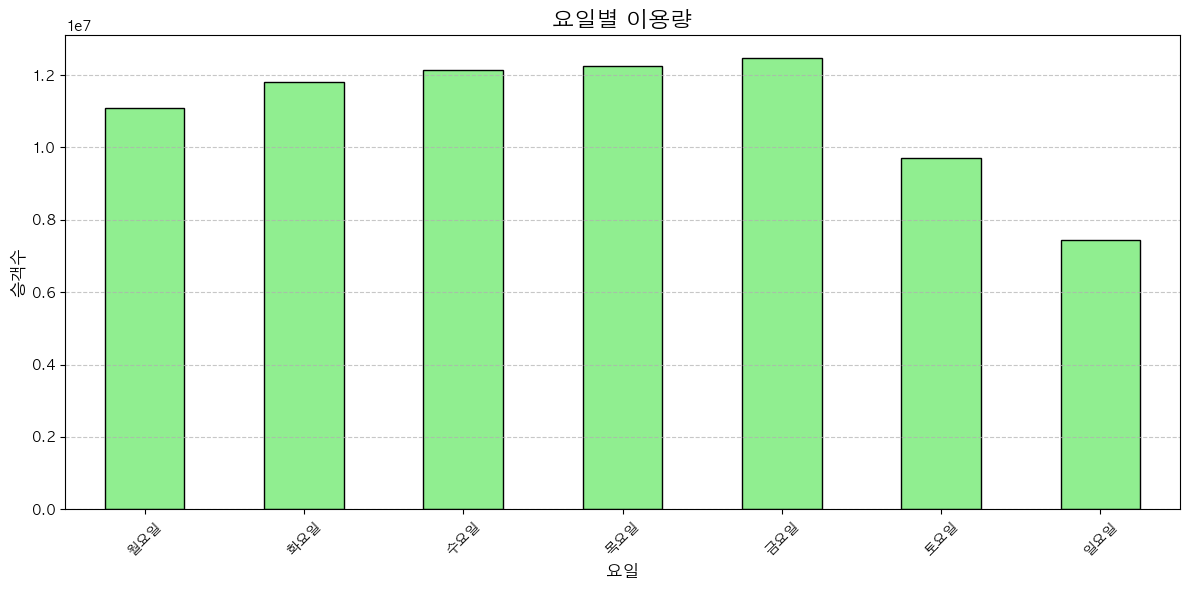

In [35]:
# 요일별 이용량 계산
day_usage = df.groupby('요일')['승객수'].sum()

# 요일 이름 매핑
day_mapping = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}
day_usage.index = day_usage.index.map(day_mapping)

# 그래프 생성
plt.figure(figsize=(12, 6))
day_usage.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('요일별 이용량', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('승객수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155520 entries, 0 to 155519
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   수송일자    155520 non-null  object 
 1   호선명     155520 non-null  float64
 2   역번호     155520 non-null  int64  
 3   역명      155520 non-null  object 
 4   승하차구분   155520 non-null  object 
 5   월       155520 non-null  int64  
 6   년       155520 non-null  int64  
 7   시간대     155520 non-null  object 
 8   승객수     155520 non-null  float64
 9   일       155520 non-null  int64  
 10  휴일여부    155520 non-null  bool   
 11  요일      155520 non-null  int64  
 12  요일_문자   155520 non-null  object 
 13  시간      155520 non-null  int64  
 14  10대     155520 non-null  int64  
 15  20대     155520 non-null  int64  
 16  30대     155520 non-null  int64  
 17  40대     155520 non-null  int64  
 18  50대 이상  155520 non-null  int64  
dtypes: bool(1), float64(2), int64(11), object(5)
memory usage: 21.5+ MB


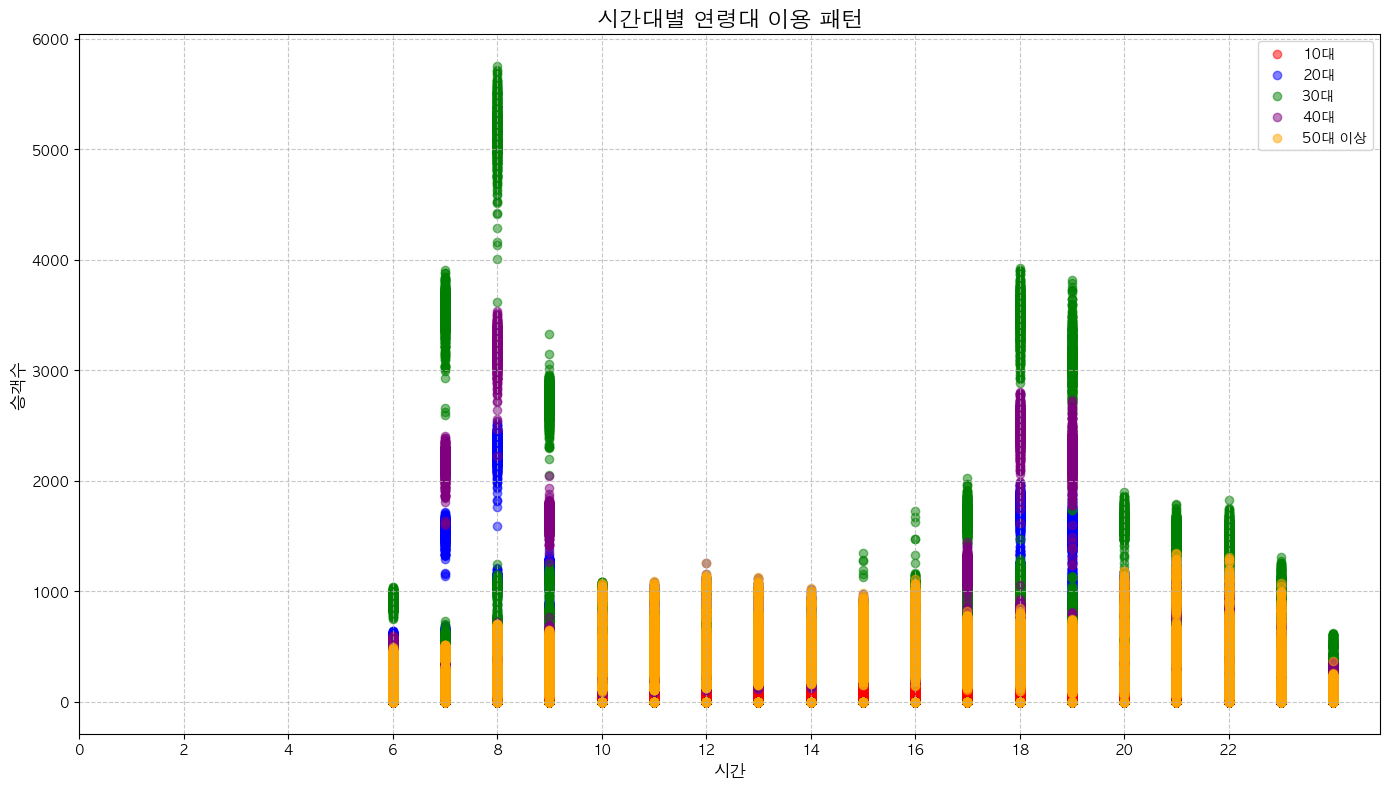

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
age_groups = ['10대', '20대', '30대', '40대', '50대 이상']
colors = ['red', 'blue', 'green', 'purple', 'orange']

for age, color in zip(age_groups, colors):
    plt.scatter(df['시간'], df[age], alpha=0.5, label=age, color=color)

plt.title('시간대별 연령대 이용 패턴', fontsize=16)
plt.xlabel('시간', fontsize=12)
plt.ylabel('승객수', fontsize=12)
plt.legend()
plt.xticks(range(0, 24, 2))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


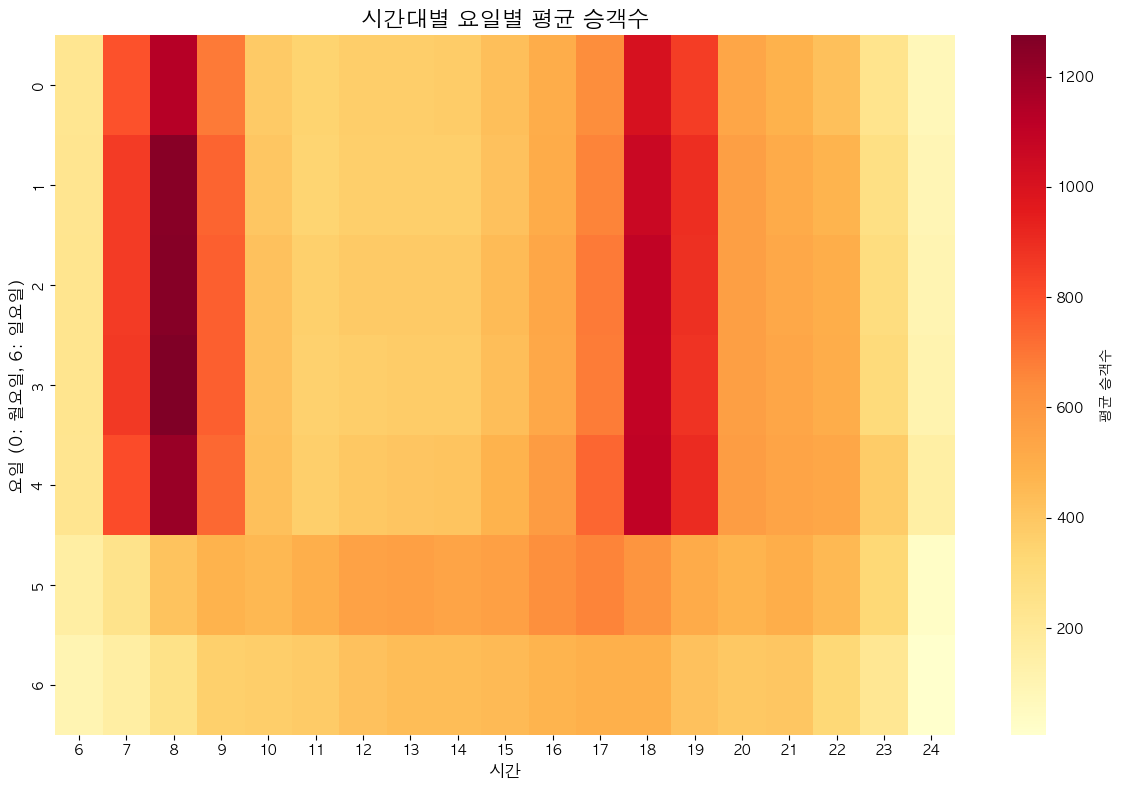

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시간대별 요일별 평균 승객수 계산
heatmap_data = df.groupby(['요일', '시간'])['승객수'].mean().unstack()

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='.0f', cbar_kws={'label': '평균 승객수'})
plt.title('시간대별 요일별 평균 승객수', fontsize=16)
plt.xlabel('시간', fontsize=12)
plt.ylabel('요일 (0: 월요일, 6: 일요일)', fontsize=12)
plt.tight_layout()
plt.show()


> 출근과 퇴근시간에 확실하게 승객수가 몰려있음

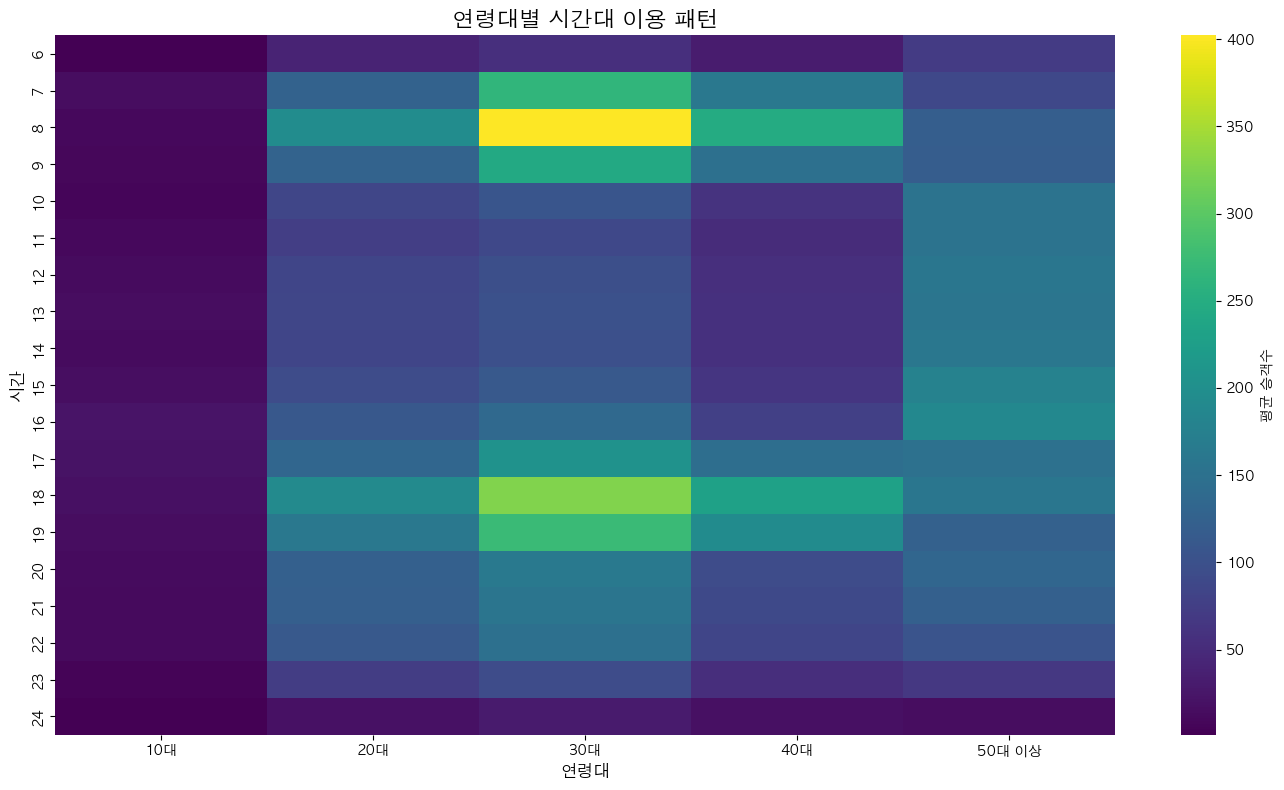

In [44]:
# 연령대별 시간대 평균 승객수 계산
age_groups = ['10대', '20대', '30대', '40대', '50대 이상']
heatmap_data = df.groupby('시간')[age_groups].mean()

# 히트맵 생성
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt='.0f', cbar_kws={'label': '평균 승객수'})
plt.title('연령대별 시간대 이용 패턴', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('시간', fontsize=12)
plt.tight_layout()
plt.show()


> 이용패턴 히트맵 확인 결과 신림역은 30대의 직장인들이 출퇴근용으로 주로 이용함

> 모델학습

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# 필요한 컬럼 선택
selected_columns = ['시간', '요일', '휴일여부', '호선명', '10대', '20대', '30대', '40대', '50대 이상', '승객수']
data = df[selected_columns]

# 원-핫 인코딩 (요일, 휴일여부 등 범주형 변수)
ohe = OneHotEncoder(sparse_output=False, drop='first')
categorical_features = ['요일', '휴일여부']
ohe_encoded = ohe.fit_transform(data[categorical_features])
ohe_encoded_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out(categorical_features))

# 원-핫 인코딩된 데이터프레임과 기존 데이터프레임 병합
data = pd.concat([data.drop(columns=categorical_features), ohe_encoded_df], axis=1)

# 독립 변수(X)와 종속 변수(y) 분리
X = data.drop(columns=['승객수'])
y = data['승객수']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.ensemble import RandomForestRegressor

# 모델 초기화 및 훈련
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [48]:
from sklearn.metrics import mean_squared_error

# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

print(f"RMSE: {rmse}")


RMSE: 2.525875281634007


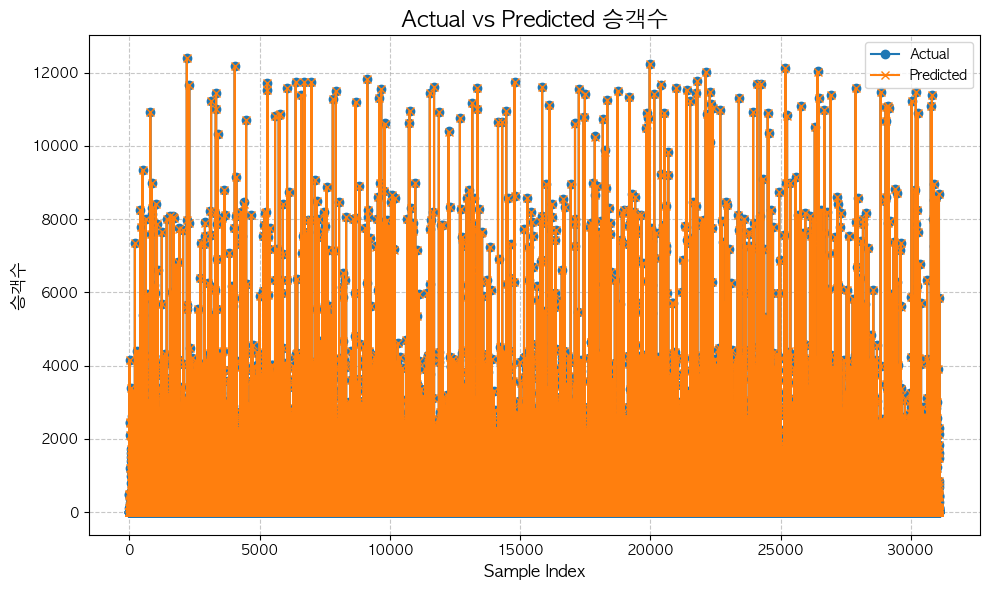

In [49]:
import matplotlib.pyplot as plt

# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(predictions, label='Predicted', marker='x')
plt.title('Actual vs Predicted 승객수', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('승객수', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [57]:
df.head()

,수송일자,호선명,역번호,역명,승하차구분,월,년,시간대,승객수,일,휴일여부,요일,요일_문자,시간,10대,20대,30대,40대,50대 이상
0,2022-06-01,2.0,230,신림,승차,6,2022,06시간대이전,801.0,1,False,2,수,6,0,191,308,178,124
1,2022-06-01,2.0,230,신림,승차,6,2022,06시간대이전,0.0,1,False,2,수,6,0,0,0,0,0
2,2022-06-01,2.0,230,신림,승차,6,2022,06시간대이전,0.0,1,False,2,수,6,0,0,0,0,0
3,2022-06-01,2.0,230,신림,승차,6,2022,06시간대이전,9.0,1,False,2,수,6,9,0,0,0,0
4,2022-06-01,2.0,230,신림,승차,6,2022,06시간대이전,246.0,1,False,2,수,6,0,0,0,0,246


In [59]:
from sklearn.model_selection import train_test_split

# 독립 변수(X)와 종속 변수(y) 설정
X = df[['시간', '일', '휴일여부','요일']]  # 연령대별 데이터와 시간
y = df[['10대', '20대', '30대', '40대', '50대 이상']]  # 타겟 변수: 승하차 인원수

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
from sklearn.ensemble import RandomForestRegressor

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [61]:
from sklearn.metrics import mean_squared_error

# 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가 (RMSE 계산)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"RMSE: {rmse}")


RMSE: 323.3346950434094


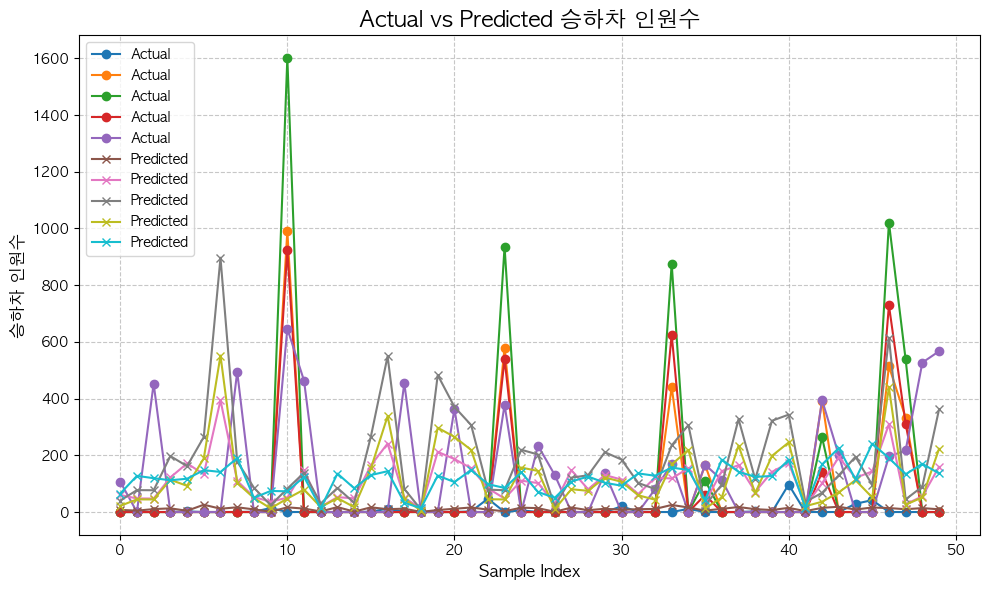

In [62]:
import matplotlib.pyplot as plt

# 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Actual', marker='o')  # 실제 값 (일부 샘플만 표시)
plt.plot(y_pred[:50], label='Predicted', marker='x')      # 예측 값 (일부 샘플만 표시)
plt.title('Actual vs Predicted 승하차 인원수', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('승하차 인원수', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


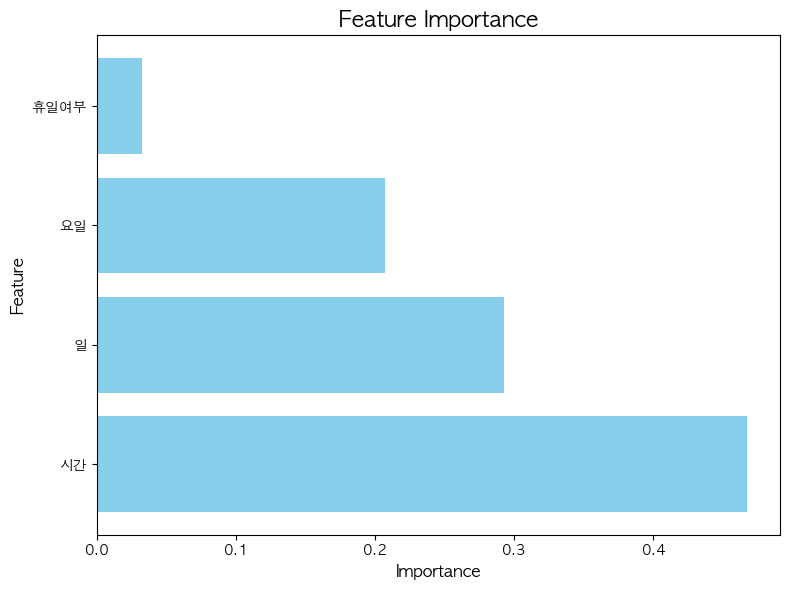

In [63]:
import pandas as pd

# 특성 중요도 추출
feature_importances = model.feature_importances_
features = X.columns

# 중요도 시각화
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


In [64]:
df

,수송일자,호선명,역번호,역명,승하차구분,월,년,시간대,승객수,일,휴일여부,요일,요일_문자,시간,10대,20대,30대,40대,50대 이상
0,2022-06-01,2.0,230,신림,승차,6,2022,06시간대이전,801.0,1,False,2,수,6,0,191,308,178,124
1,2022-06-01,2.0,230,신림,승차,6,2022,06시간대이전,0.0,1,False,2,수,6,0,0,0,0,0
2,2022-06-01,2.0,230,신림,승차,6,2022,06시간대이전,0.0,1,False,2,수,6,0,0,0,0,0
3,2022-06-01,2.0,230,신림,승차,6,2022,06시간대이전,9.0,1,False,2,수,6,9,0,0,0,0
4,2022-06-01,2.0,230,신림,승차,6,2022,06시간대이전,246.0,1,False,2,수,6,0,0,0,0,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155515,2024-05-31,2.0,230,신림,하차,5,2024,24시간대이후,0.0,31,False,4,금,24,0,0,0,0,0
155516,2024-05-31,2.0,230,신림,하차,5,2024,24시간대이후,0.0,31,False,4,금,24,0,0,0,0,0
155517,2024-05-31,2.0,230,신림,하차,5,2024,24시간대이후,16.0,31,False,4,금,24,16,0,0,0,0
155518,2024-05-31,2.0,230,신림,하차,5,2024,24시간대이후,24.0,31,False,4,금,24,0,0,0,0,24


교차 검증 RMSE 점수: [327.27020915 322.92552583 326.99983576 320.61475701 330.16889419]
평균 교차 검증 RMSE: 325.5958 (+/- 6.7900)
훈련 세트 RMSE: 311.6768
테스트 세트 RMSE: 323.3347
훈련 세트 R^2 점수: 0.0630
테스트 세트 R^2 점수: -0.0127
예측률 (R^2 점수): -0.0127


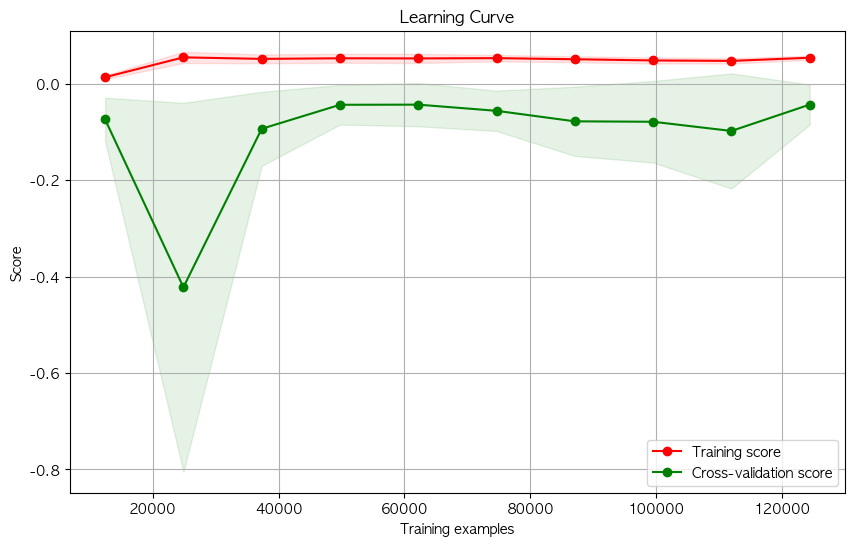

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import r2_score

# 1. 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"교차 검증 RMSE 점수: {cv_rmse_scores}")
print(f"평균 교차 검증 RMSE: {cv_rmse_scores.mean():.4f} (+/- {cv_rmse_scores.std() * 2:.4f})")

# 2. 테스트 점수와 훈련 점수
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"훈련 세트 RMSE: {train_rmse:.4f}")
print(f"테스트 세트 RMSE: {test_rmse:.4f}")
print(f"훈련 세트 R^2 점수: {train_r2:.4f}")
print(f"테스트 세트 R^2 점수: {test_r2:.4f}")

# 3. 예측률 (R^2 점수로 대체)
print(f"예측률 (R^2 점수): {test_r2:.4f}")

# 4. 학습 곡선 그래프
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


> 퓨처의 뚜렷한 특성이 없어 서비스하려고하는 앱에는 사용하지 않기로 결정